In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
Recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
Recent_date

'2017-08-23'

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
Most_recent_date = dt.datetime.strptime(Recent_date, '%Y-%m-%d') 

# Calculate the date one year from the last date in data set.
twelve_months_before = dt.datetime.strptime(Recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
print (twelve_months_before)

# Perform a query to retrieve the data and precipitation scores
P_results = session.query(Measurement.date,func.avg(Measurement.prcp)).group_by(Measurement.date).filter(Measurement.date >= twelve_months_before).all()
#P_results = session.query(Measurement.date,Measurement.prcp).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(P_results, columns=['date', 'precipitation'])
df

# Sort the dataframe by date
# df.set_index('date', inplace=True)



2016-08-23 00:00:00


,date,precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667
...,...,...
360,2017-08-19,0.030000
361,2017-08-20,0.005000
362,2017-08-21,0.193333
363,2017-08-22,0.166667


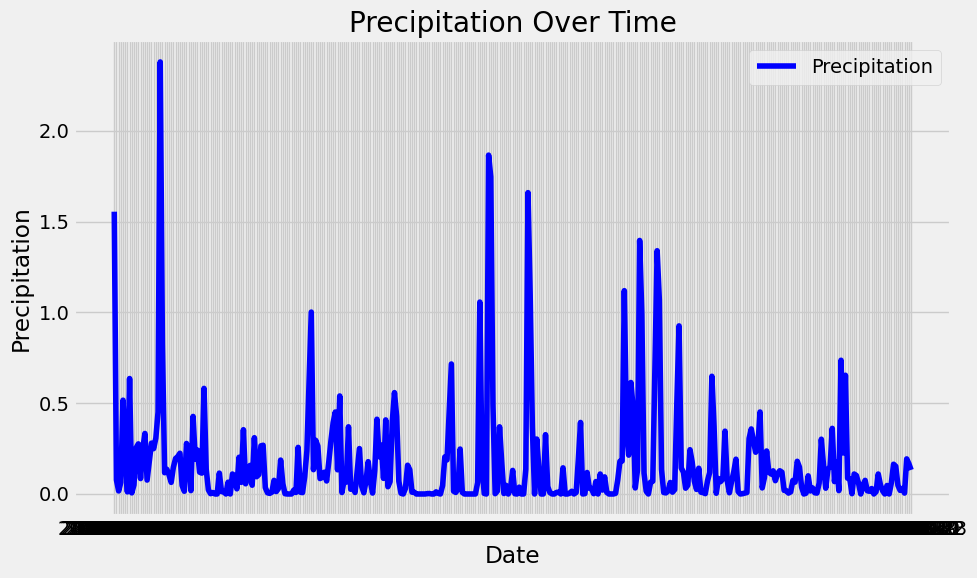

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6)) 
plt.plot(df['date'], df['precipitation'], linestyle='-', color='b', label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("precipitation_analysis.png")
plt.show()

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.tobs))\
             .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for station in station_count:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = station_count[0][0]
print (active_station)

USC00519281


In [51]:
station_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == active_station)
                      
stats_list=list(station_stats)
print(stats_list)

[(54.0, 85.0, 71.66378066378067)]


In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == active_station).\
                filter(Measurement.date >= twelve_months_before).all()
tobs_df = pd.DataFrame(t_results)
#tobs_df.set_index('station', inplace=True)
tobs_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


<function matplotlib.pyplot.show(close=None, block=None)>

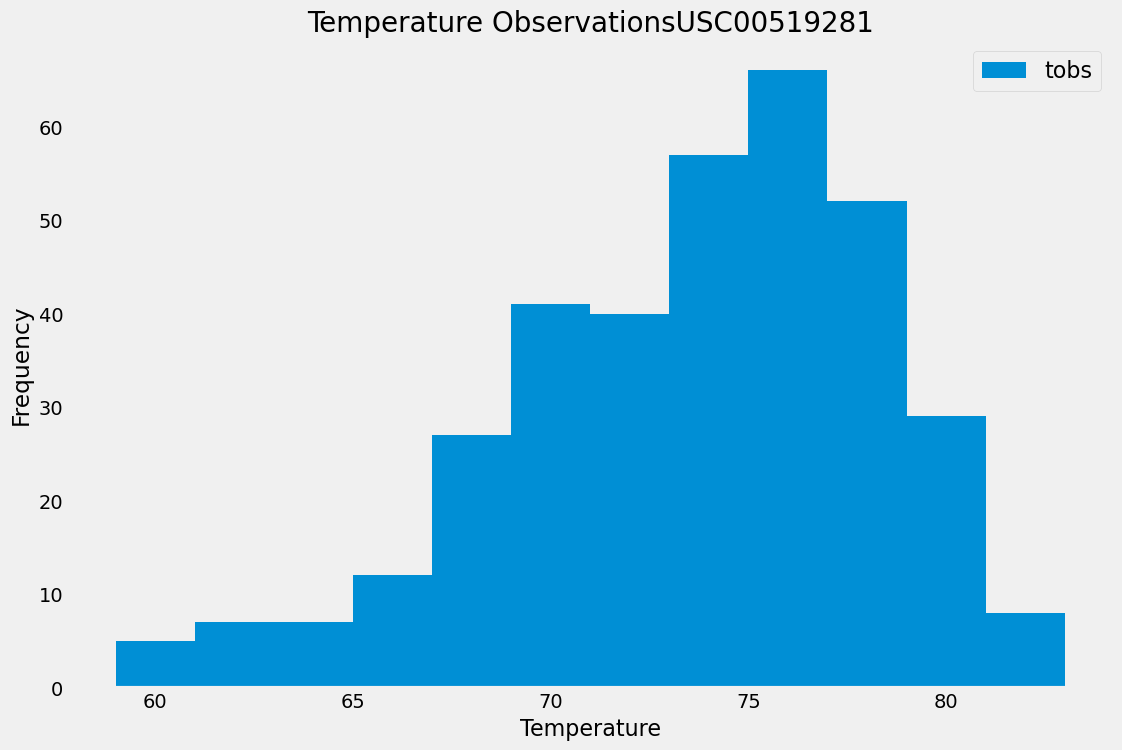

In [55]:
tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title("Temperature Observations" + active_station, fontsize=20)
plt.xlabel("Temperature", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("../StationTemperature.png")
plt.show


# Close Session

In [49]:
session.close()